# Equipe 7:
- Gabriel Lenon Barros da Silva (glbs@cesar.school)
- Bruno Venceslau Barbosa (bvb@cesar.school)
- Carolina Queiroz de Sousa (cqs@cesar.school)
- Gustavo Miguel Ferreira da Silva (gmfs@cesar.school)
- Pedro Henrique de Amaral lira (phal@cesar.school)

# Arvores de Decisão - Regressão

## Dicionário dos dados:

Aquisição de dados: Este é os dados de clima para Seattle, WA, em 2016,
usando o instrumento NOAA Climate Data Online.

- year: 2016
- month: número do mês do ano (por exemplo, 7 para julho)
- day: número do dia do ano (por exemplo, 30 para 30 de junho)
- week: dia da semana como uma string de caractere (por exemplo,
"segunda-feira")
- temp_1: temperatura de um dia anterior
- temp_2: temperatura de dois dias anteriores
- average: Média histórica da temperatura máxima
- Previsão do seu amigo (aleatório), valor menor 20 abaixo da média ou 20 acima da média
- actual: Medição de temperatura máxima real

Atividade:
1. Carregamento de dados
2. O valor esperado de saída é **actual**
3. Remover as colunas 'year', 'month', 'day', 'week' pois não vamos considerar dados históricos relacionados a série temporal
4. Análise descritiva dos dados
5. Remoção de campos desnecessários
6. Tratamento de dados nulos e/ou faltantes
7. Separação dos dados, holdout
8. Normalização dos dados
9. Treinamento de modelos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Obtenha os dados
** Leia o arquivo csv 'temps.csv' em um DataFrame **

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Bruno-Venceslau/dataset-modelos_preditivos/refs/heads/main/temps.csv')

** Verifique o cabeçalho do DataFrame.**

In [9]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [11]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Remoção das colunas year,	month, day e week, pois não vamos trabalhar com a série temporal

In [12]:
df.drop(columns=["year", "month", "day", "week"], inplace=True)

In [13]:
df.head()

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,45,45,45.6,45,43,50,44,29
1,44,45,45.7,44,41,50,44,61
2,45,44,45.8,41,43,46,47,56
3,44,41,45.9,40,44,48,46,53
4,41,40,46.0,44,46,46,46,41


## Estatística Descritiva

Dados faltantes

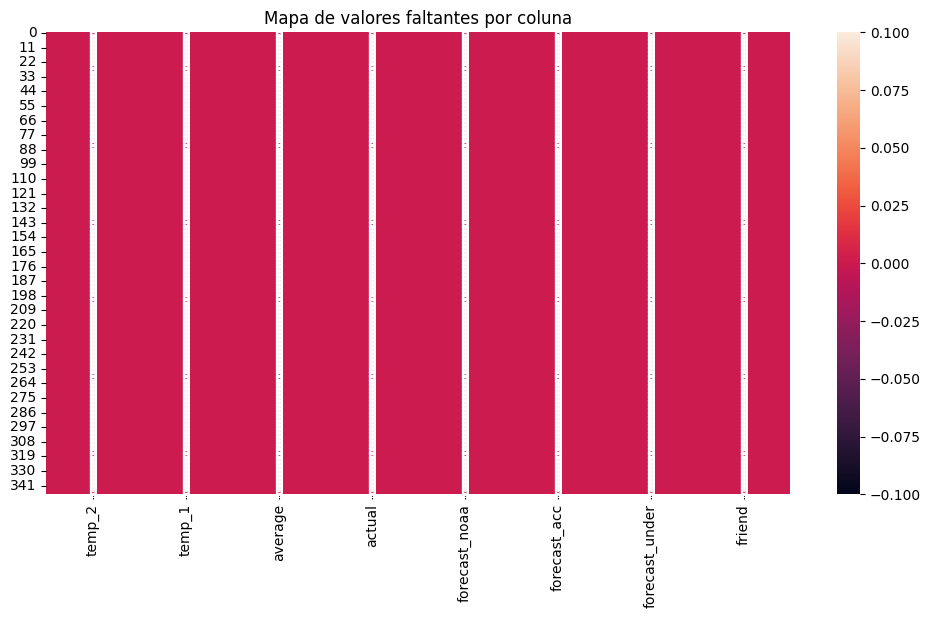

temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64


In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), annot=True)
plt.title("Mapa de valores faltantes por coluna")
plt.show()
print(df.isnull().sum())

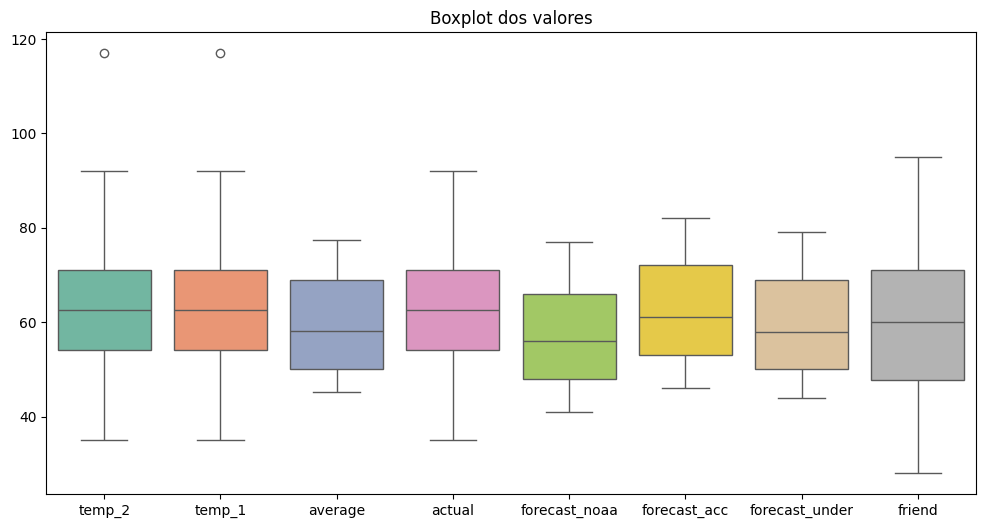

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,  palette="Set2")
plt.title("Boxplot dos valores")
plt.show()

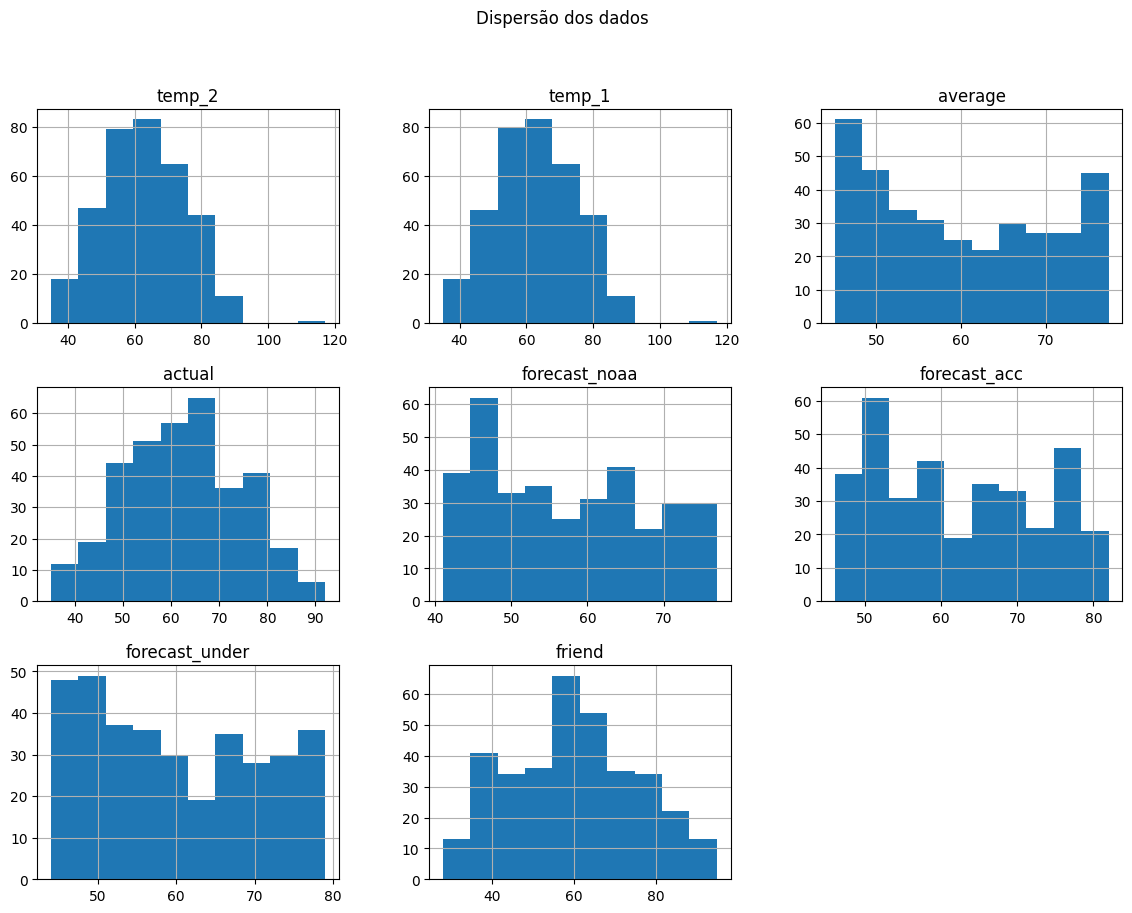

In [16]:
df.hist(figsize=(14, 10), grid=True)
plt.suptitle("Dispersão dos dados")
plt.show()

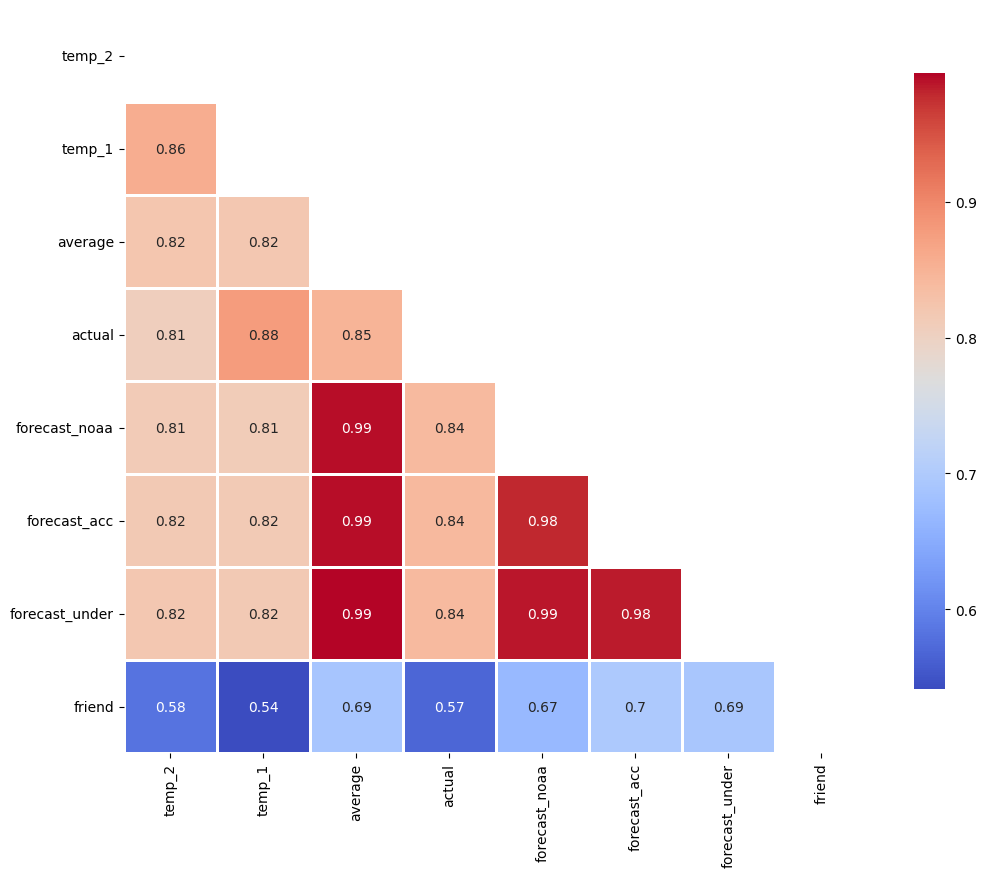

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, linewidths=1, linecolor='white', square=True,cbar_kws={"shrink": 0.8},  cmap="coolwarm")
plt.show()

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(columns=["actual"], axis=1)
y = df["actual"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
pd.DataFrame(X_train)

,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
245,68,69,69.7,65,74,71,88
101,60,59,58.1,57,63,58,66
208,85,88,77.3,75,79,77,70
132,82,65,64.7,63,69,64,58
17,54,50,47.5,44,48,49,58
...,...,...,...,...,...,...,...
188,74,71,75.1,71,77,76,95
71,54,49,53.6,49,58,52,70
106,77,89,59.0,59,63,59,61
270,66,60,60.2,56,64,60,78


In [21]:
pd.DataFrame(y_train)

,actual
245,71
101,59
208,76
132,57
17,54
...,...
188,74
71,51
106,81
270,60


## Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [22]:
from sklearn.preprocessing import StandardScaler

Converta as variáveis independentes com o StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [24]:
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled[:3]

array([[ 0.46024541,  0.49565297,  0.91456372,  0.70092213,  1.07792273,
         1.01645538,  1.72343516],
       [-0.22082647, -0.31541552, -0.17334022, -0.04160725,  0.04669442,
        -0.18105611,  0.35734395],
       [ 1.90752316,  2.0366831 ,  1.62732837,  1.62908385,  1.54666288,
         1.56915299,  0.60572417]])

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          261 non-null    float64
 1   temp_1          261 non-null    float64
 2   average         261 non-null    float64
 3   forecast_noaa   261 non-null    float64
 4   forecast_acc    261 non-null    float64
 5   forecast_under  261 non-null    float64
 6   friend          261 non-null    float64
dtypes: float64(7)
memory usage: 14.4 KB


In [27]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_2          87 non-null     float64
 1   temp_1          87 non-null     float64
 2   average         87 non-null     float64
 3   forecast_noaa   87 non-null     float64
 4   forecast_acc    87 non-null     float64
 5   forecast_under  87 non-null     float64
 6   friend          87 non-null     float64
dtypes: float64(7)
memory usage: 4.9 KB


## Árvores de Decisão

In [28]:
#importar a arvore de decisão
from sklearn import tree

In [29]:
model = tree.DecisionTreeRegressor()

In [30]:
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [31]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

### Executar o modelo treinado na base de treinamento

In [32]:
#extrair as inferencias y_pred
#calcular o score

#treino
print("Train Score:", model.score(X_train_scaled, y_train))

#teste
print("Test Score:", model.score(X_test_scaled, y_test))

Train Score: 1.0
Test Score: 0.6960902972795293


In [46]:
# treino
print_metrics(y_train, y_train_pred)

MEAN:  0.0
MAPE:  0.0
MSE:  0.0
RMSE:  0.0
R²:  1.0


In [45]:
# teste
print_metrics(y_test, y_test_pred)

MEAN:  5.022988505747127
MAPE:  0.07850757324240705
MSE:  42.264367816091955
RMSE:  6.501105122676602
R²:  0.6960902972795293


### Avaliação de Regressores - Exibir os Resultados

In [43]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [39]:
def print_metrics(y_test, y_test_pred):
  print("MEAN: ", mean_absolute_error(y_test, y_test_pred))
  print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))
  print("MSE: ", mean_squared_error(y_test, y_test_pred))
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print("R²: ", r2_score(y_test, y_test_pred))

In [44]:
print_metrics(y_test, y_test_pred)

MEAN:  5.022988505747127
MAPE:  0.07850757324240705
MSE:  42.264367816091955
RMSE:  6.501105122676602
R²:  0.6960902972795293


## Validação cruzada com o algoritmo Árvores de Decisão

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (reg_cv_scores['test_score'].mean(), reg_cv_scores['test_score'].std()))

### Exiba a árvore de decisão do modelo treinado

In [ ]:
from sklearn import tree

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(#MODELO,
                   feature_names=X_train.columns,
                   class_names=y_test.unique(),
                   filled=True)

### Avaliar o melhor valor de max_depth

In [ ]:
import numpy as np

score = []

for i in range(1,21):
  #MODELO
  #FIT
  #SCORE

plt.figure(figsize=(10,6))
plt.plot(range(1,21), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Score Rate')

### Criar um regressor com o melhor valor para max_depth e avalie





In [ ]:
reg_best = DecisionTreeRegressor(max_depth=score.index(max(score))+1)

reg_best.fit(X_train, y_train)
print('Train: ', reg_best.score(X_train, y_train))
print('Test: ',reg_best.score(X_test, y_test))

In [ ]:
print_metrics(y_test, reg_best.predict(X_test))

### Plot dos valores previstos vs reais

In [ ]:
y_pred = reg_best.predict(X_test)

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_test)
plt.title('Valores previstos vs reais')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.title('Melhor regressor')
_ = tree.plot_tree(reg_best,
                   feature_names=df.columns,
                   class_names=y_test.unique(),
                   filled=True)

Conclusão